# The Sparks Foundation - internship 
#### Data Science & Business Analytics Intern

## Exploratory Data Analysis - Sports(Indian Premier League)
## Task 5
## Author: Anay Panja


 #internship   #grip   #thesparksfoundation  #GRIPSEPTEMBER21

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from csv file
matches_data = pd.read_csv('matches.csv')
deliveries_data = pd.read_csv('deliveries.csv')

In [3]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
deliveries_data.shape

(179078, 21)

In [5]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
deliveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [7]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
matches_data.shape

(756, 18)

In [9]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
 matches_data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
 matches_data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [12]:
total_match_per_season = matches_data.groupby('season')['id'].count().reset_index().rename(columns={'id':'total_matchs'})
total_match_per_season

,season,total_matchs
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, ' Total number of match in each season')

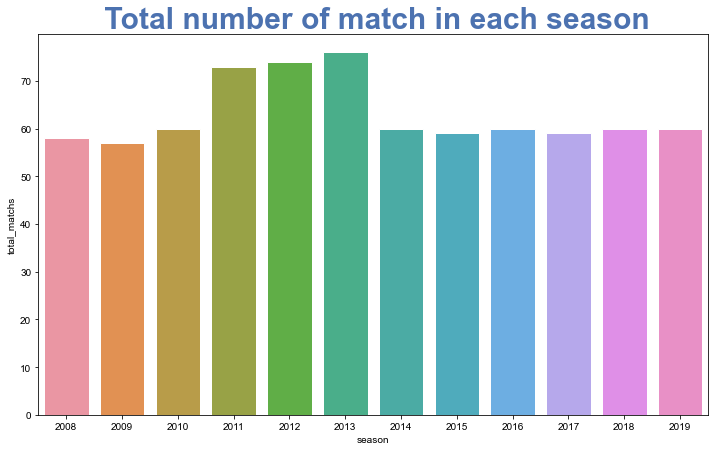

In [13]:
plt.subplots(figsize=(12, 7))
sns.set_theme(style="whitegrid")
sns.barplot(x="season", y="total_matchs", data=total_match_per_season)
plt.title(" Total number of match in each season", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

In [14]:
feature_per_season = matches_data[['season','id']].merge(deliveries_data,left_on='id',right_on='match_id').drop(['id','match_id'],axis=1)
feature_per_season

,season,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,2019,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,2019,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,2019,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,2019,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [15]:
total_run_per_season = feature_per_season.groupby('season')['total_runs'].sum().reset_index()
total_run_per_season

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


Text(0.5, 1.0, 'Total runs in each season ')

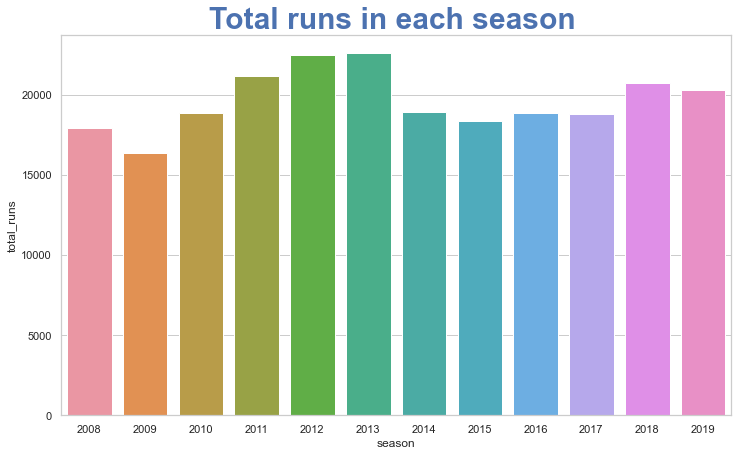

In [16]:
plt.subplots(figsize=(12, 7))
sns.set_theme(style="whitegrid")
sns.barplot(x="season", y="total_runs", data=total_run_per_season)
plt.title("Total runs in each season ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

Text(0.5, 1.0, 'Total runs in each season ')

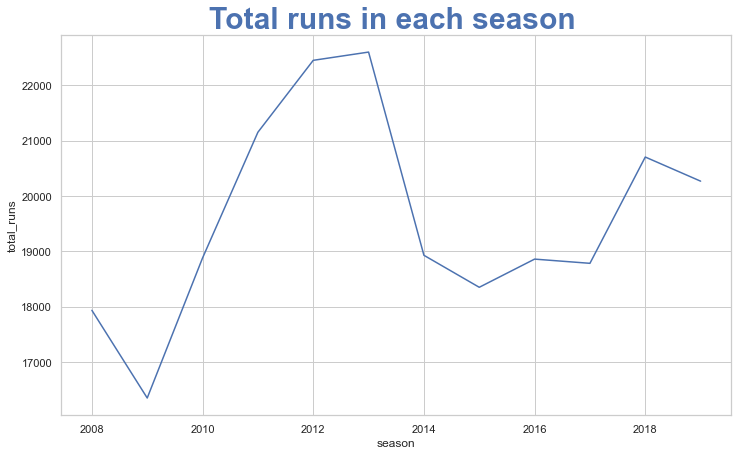

In [17]:
plt.subplots(figsize=(12, 7))
sns.set_theme(style="darkgrid")
sns.lineplot(x="season", y="total_runs",data=total_run_per_season)
plt.title("Total runs in each season ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

In [18]:
avg_runs_per_match = pd.merge(total_run_per_season,total_match_per_season,on=['season'])
avg_runs_per_match['avg_runs_per_match'] = avg_runs_per_match['total_runs'] / avg_runs_per_match['total_matchs']
avg_runs_per_match

,season,total_runs,total_matchs,avg_runs_per_match
0,2008,17937,58,309.258621
1,2009,16353,57,286.894737
2,2010,18883,60,314.716667
3,2011,21154,73,289.780822
4,2012,22453,74,303.418919
5,2013,22602,76,297.394737
6,2014,18931,60,315.516667
7,2015,18353,59,311.067797
8,2016,18862,60,314.366667
9,2017,18786,59,318.406780


Text(0.5, 1.0, 'Avg. runs per match in each season ')

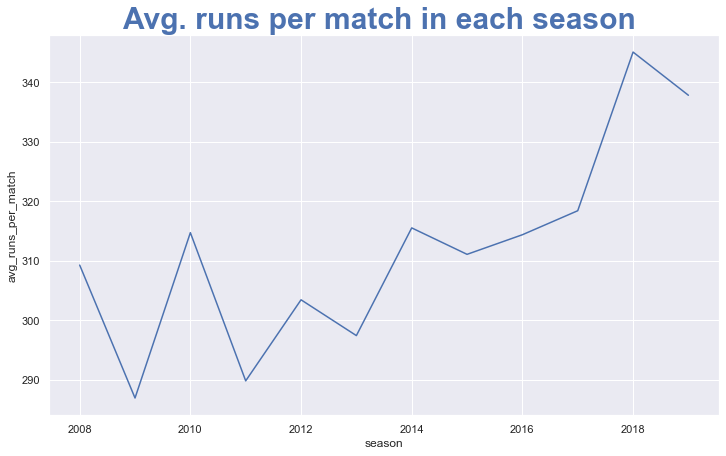

In [19]:
plt.subplots(figsize=(12, 7))
sns.set_theme(style="darkgrid")
sns.lineplot(x="season", y="avg_runs_per_match",data=avg_runs_per_match)
plt.title("Avg. runs per match in each season ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

In [20]:
temp =  matches_data['toss_winner'].value_counts()
temp

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Text(0.5, 1.0, 'Total number of toss winning in each team ')

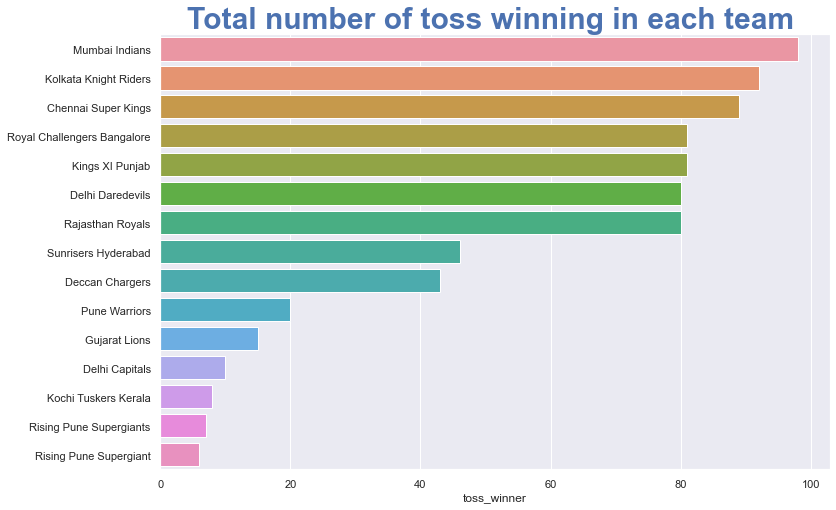

In [21]:
plt.subplots(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(x=temp, y=temp.index)
plt.title("Total number of toss winning in each team ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

Text(0.5, 1.0, 'Toss decision in each team ')

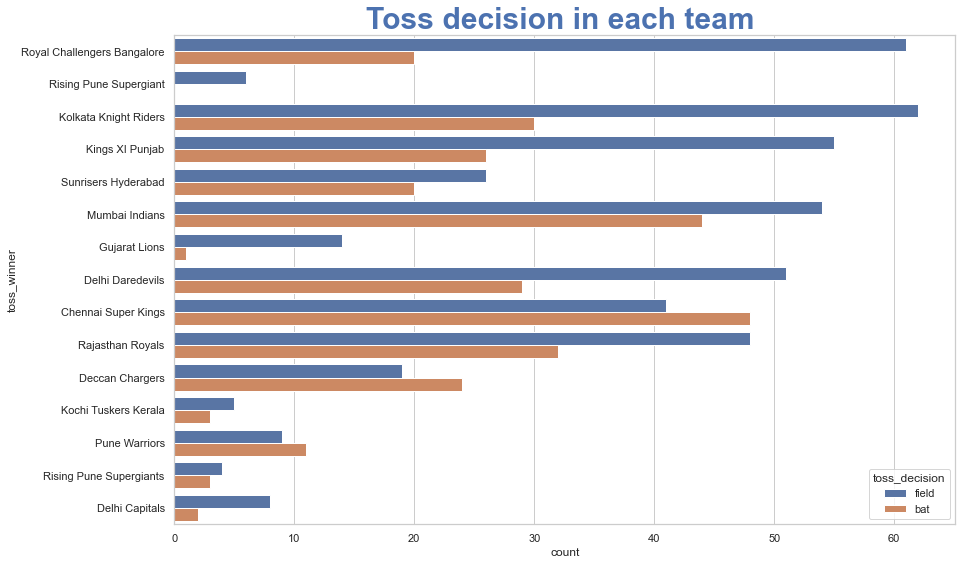

In [22]:
plt.subplots(figsize=(14, 9))
sns.set_theme(style="whitegrid")
sns.countplot(y="toss_winner", data=matches_data,hue='toss_decision')
plt.title("Toss decision in each team ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

Text(0.5, 1.0, 'Total number of toss decision in each season ')

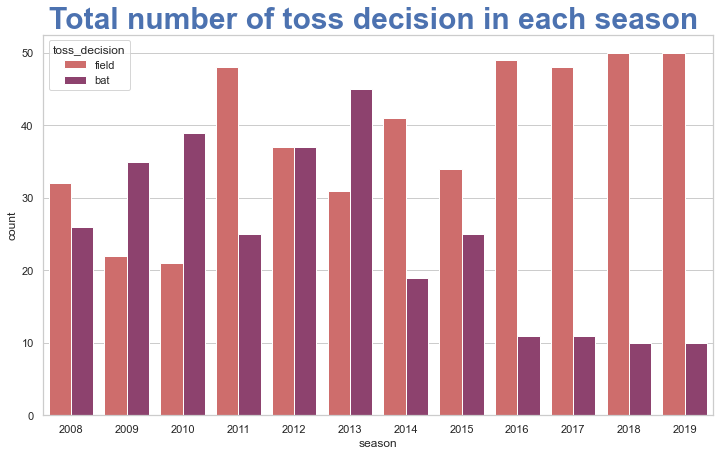

In [23]:
plt.subplots(figsize=(12, 7))
sns.set_theme(style="whitegrid")
sns.countplot(x="season", data=matches_data,hue='toss_decision',palette="flare")
plt.title("Total number of toss decision in each season ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

In [24]:
################################### Best stadium for winning by wickets ########################################

matches_data.venue[matches_data.win_by_runs==0].mode()

0    Eden Gardens
dtype: object

In [25]:
################################### Best stadium for winning by runss ###########################################

matches_data.venue[matches_data.win_by_wickets==0].mode()

0    Wankhede Stadium
dtype: object

In [26]:
######################################## Best run chasing team #################################################

matches_data.winner[matches_data.win_by_runs==0].mode() 

0    Kolkata Knight Riders
dtype: object

In [27]:
######################################## Best defending team ###################################################

matches_data.winner[matches_data.win_by_wickets==0].mode() 

0    Mumbai Indians
dtype: object

Text(0.5, 1.0, 'Win the toss Win the match ')

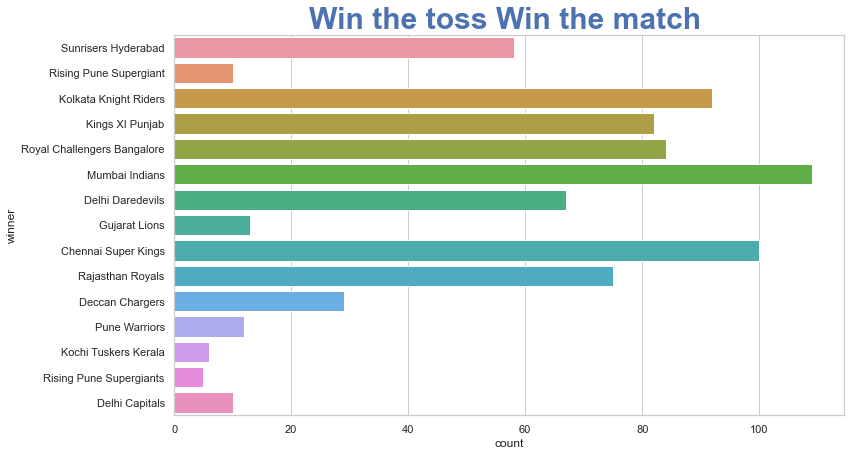

In [28]:
win_toss_win_the_match =  matches_data['toss_winner'] = matches_data['winner']
plt.subplots(figsize=(12, 7))
sns.countplot( y=win_toss_win_the_match)
plt.title("Win the toss Win the match ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

c:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Toss decision in IPL ')

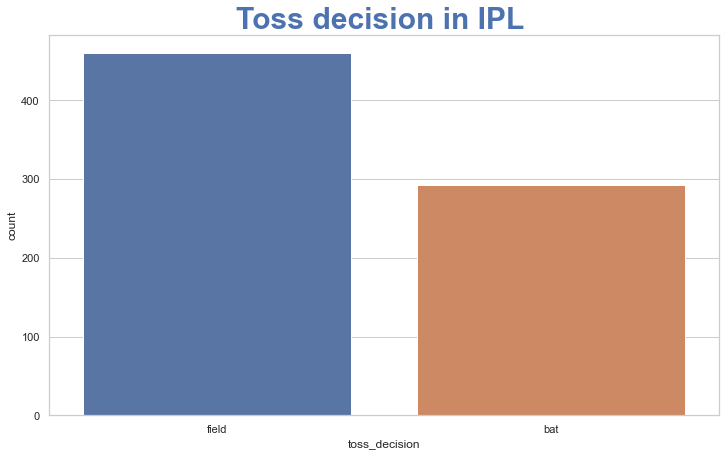

In [29]:
plt.subplots(figsize=(12, 7))
sns.countplot(matches_data.toss_decision[matches_data.toss_winner==matches_data.winner])
plt.title("Toss decision in IPL ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)


In [30]:
top_batsman = deliveries_data.groupby('batsman')['total_runs'].sum().reset_index()
top_batsman.columns = ['batsman','total_runs']
top_batsman=top_batsman.sort_values(by='total_runs',ascending=False).reset_index().drop('index',axis=1)
top_batsman.head(15)

,batsman,total_runs
0,SK Raina,5651
1,V Kohli,5616
2,RG Sharma,5057
3,DA Warner,4975
4,S Dhawan,4876
5,CH Gayle,4873
6,RV Uthappa,4703
7,MS Dhoni,4691
8,AB de Villiers,4583
9,G Gambhir,4485


Text(0.5, 1.0, 'Top batsman in IPL(by total runs) ')

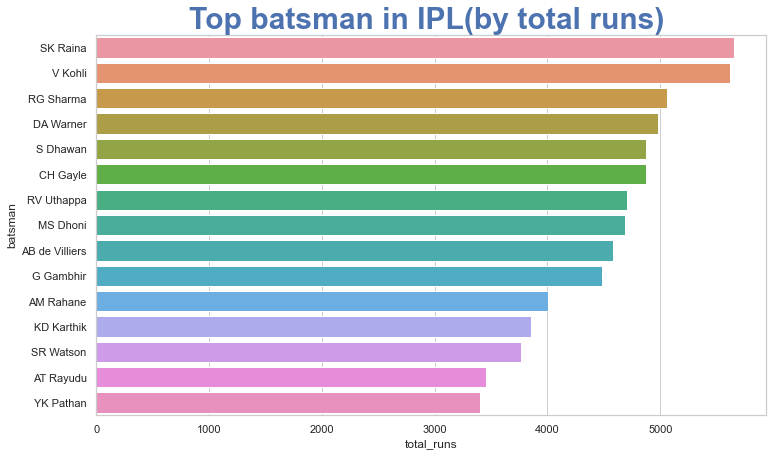

In [31]:
plt.subplots(figsize=(12, 7))
sns.set_theme(style="whitegrid")
sns.barplot(y="batsman",x='total_runs', data=top_batsman.head(15))
plt.title("Top batsman in IPL(by total runs) ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

In [32]:
top_player_of_match = matches_data['player_of_match'].value_counts()
top_player_of_match = top_player_of_match.head(20)
top_player_of_match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           12
V Sehwag          11
DR Smith          11
AD Russell        11
A Mishra          11
JH Kallis         10
KA Pollard        10
SE Marsh           9
AT Rayudu          9
Name: player_of_match, dtype: int64

Text(0.5, 1.0, 'Got most Man of the match awards in IPL ')

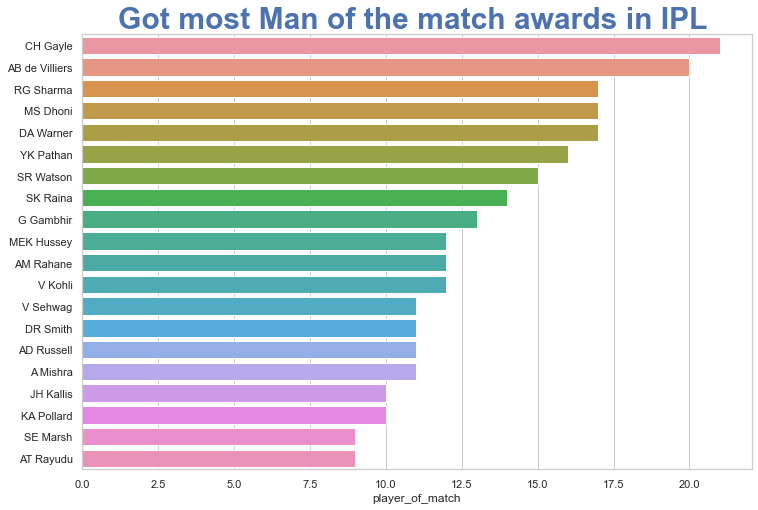

In [33]:
plt.subplots(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(x=top_player_of_match, y=top_player_of_match.index)
plt.title("Got most Man of the match awards in IPL ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

In [34]:
CH_Gayle = deliveries_data[deliveries_data['batsman']=='CH Gayle']
CH_Gayle

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177820,11346,2,Kings XI Punjab,Chennai Super Kings,10,5,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177821,11346,2,Kings XI Punjab,Chennai Super Kings,10,6,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177822,11346,2,Kings XI Punjab,Chennai Super Kings,10,7,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177825,11346,2,Kings XI Punjab,Chennai Super Kings,11,2,CH Gayle,KL Rahul,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


Text(0.5, 1.0, ' CH Gayle dismissal type in IPL')

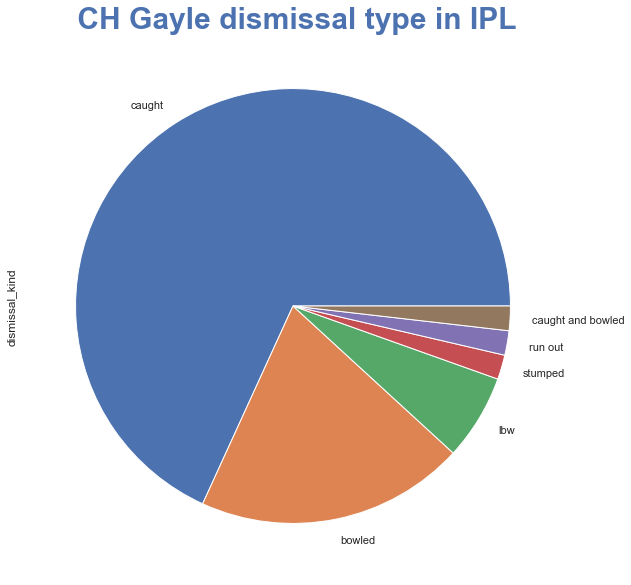

In [35]:
plt.subplots(figsize=(12,10))
CH_Gayle['dismissal_kind'].value_counts().plot.pie()
plt.title(" CH Gayle dismissal type in IPL", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

Text(0.5, 1.0, 'CH Gayle facing most bowling team ')

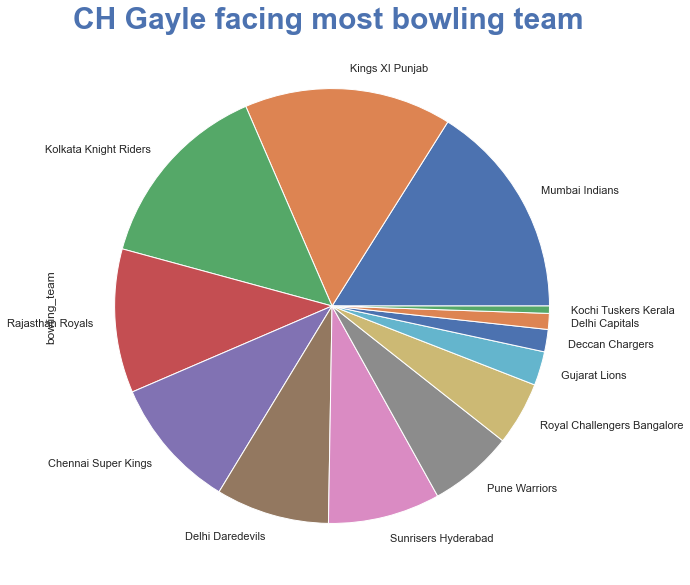

In [36]:
plt.subplots(figsize=(12,10))
CH_Gayle['bowling_team'].value_counts().plot.pie()
plt.title("CH Gayle facing most bowling team ", fontdict={'fontweight':"bold",'color':"b"},fontsize=30)

#  THANK YOU   